In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Загружаем датасет

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Построим графики зависимости 'sepal length - sepal width' и 'petal length - petal width'

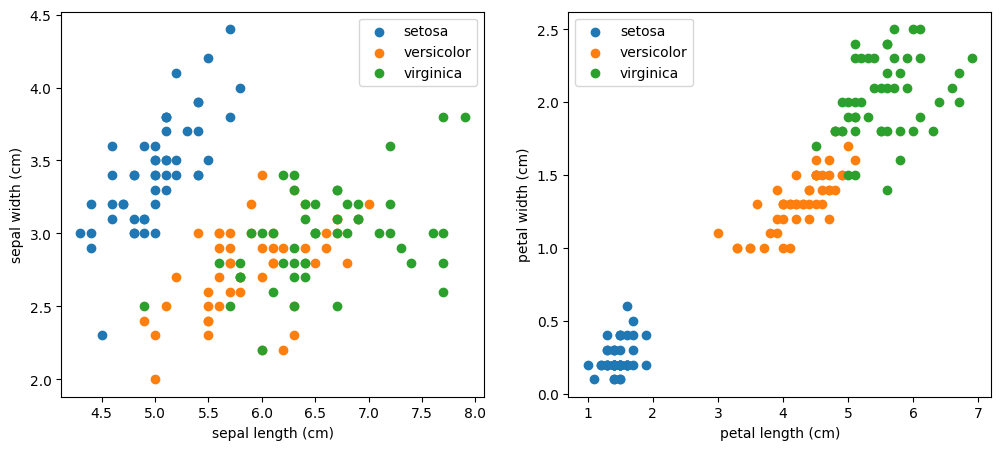

In [14]:
plt.figure(figsize=(12, 5))
for j, feature in enumerate(["sepal", "petal"]):
    for i, name in enumerate(iris.target_names):
        ax = plt.subplot(1, 2, j + 1)
        first = df[df["target"] == i][feature + " length (cm)"]
        second = df[df["target"] == i][feature + " width (cm)"]
        target = df[df["target"] == i]["target"]
        ax.scatter(first, second, label=name)
        ax.set_xlabel(feature + " length (cm)")
        ax.set_ylabel(feature + " width (cm)")
        ax.legend()

Действительно, setosa отделен от других. Теперь проделаем тоже самое с помощью seaborn.pairplot

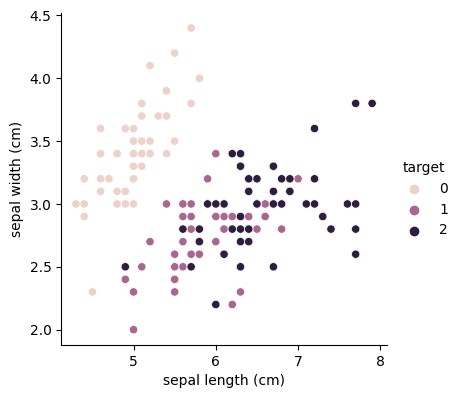

In [4]:
sns.pairplot(data=df, x_vars="sepal length (cm)", y_vars="sepal width (cm)", hue="target", height=4)

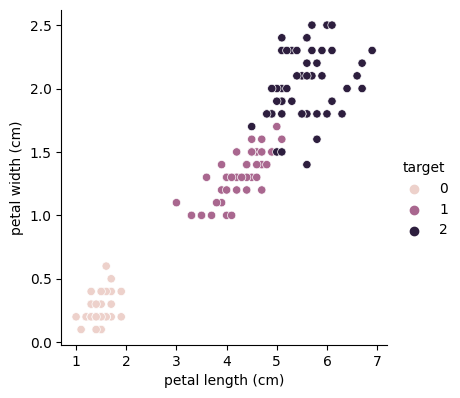

In [5]:
sns.pairplot(data=df, x_vars="petal length (cm)", y_vars="petal width (cm)", hue="target", height=4)

Получаем тот же результат только проще. 

Теперь разобъем датасет на два: в первом останутся setosa и
versicolor, во втором – versicolor и virginica

In [6]:
df1 = df[df["target"] != 2]
df2 = df[df["target"] != 0]

Разбиваем их на обучающую и тестовую выборки и отделим целевую переменную от данных

In [7]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(df1.drop(["target"], axis=1),
                                                        df1["target"], test_size=0.3, stratify=df1["target"])
X2_train, X2_test, y2_train, y2_test = train_test_split(df2.drop(["target"], axis=1),
                                                        df2["target"], test_size=0.3, stratify=df2["target"])

Теперь применим логистическую регрессию

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(random_state=0)

Для первого датасета

In [9]:
clf.fit(X1_train, y1_train)
y1_pred = clf.predict(X1_test)
print("Точность:", accuracy_score(y1_test, y1_pred))

Точность: 1.0


Получили идеальное качество. 

Теперь для второго датасета

In [10]:
clf.fit(X2_train, y2_train)
y2_pred = clf.predict(X2_test)
print("Точность:", accuracy_score(y2_test, y2_pred))

Точность: 0.9666666666666667


Тут качество тоже очень хорошое

Проделаем теперь все тоже самое на синтетическом датасете. Сначала сгенерируем его и отобразим на графике

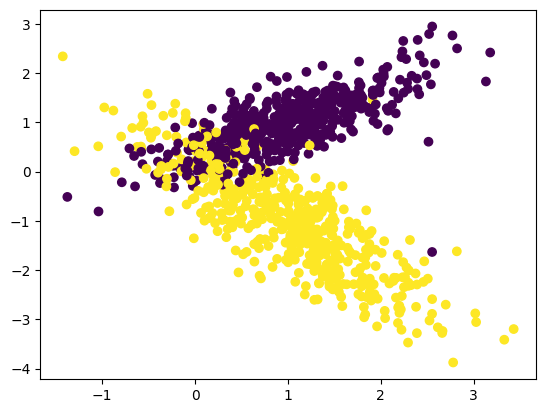

In [11]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
n_informative=2,random_state=1, n_clusters_per_class=1)

plt.scatter(X.T[0], X.T[1], c=y)

Теперь разделяем сгенерированный датасет на обучающую и тестовую части и применяем логистическую регрессию

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [13]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Точность:", accuracy_score(y_test, y_pred))

Точность: 0.8933333333333333
